In [38]:
import pandas as pd
from glob import glob

# Old dataset

In [137]:
cnt = pd.DataFrame()
for file in glob('../calibS-1/*.txt'):
  print(file)
  cnt = pd.concat([cnt,pd.read_csv(file,sep=' ', header=None,index_col=0)],axis=1)

../calibS-1/Joints.txt
../calibS-1/GearTorque.txt
../calibS-1/MeasuredPositionsLeica.txt
../calibS-1/MeasuredPositionsTS_Model.txt
../calibS-1/RobotPositions.txt
../calibS-1/DriveTorque.txt


In [144]:
cnt.columns=range(cnt.shape[1])
cnt

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
0,94.429290,-53.369570,67.849075,4.676737,17.413774,-15.608587,0.000000,0.00000,0.0000,0.000000,...,1257.782997,-93.431758,1.529676,176.695513,0.003898,0.054700,0.011997,-0.004777,-0.002837,0.011410
1,91.151010,-52.101610,66.189760,48.378105,27.118320,-67.453530,0.000000,0.00000,0.0000,0.000000,...,1257.630117,-111.705106,0.419940,176.379760,-0.019028,-0.044321,-0.028385,-0.010518,0.000923,-0.017298
2,100.432630,-48.472008,59.058144,-52.297527,44.670227,56.954082,0.000000,0.00000,0.0000,0.000000,...,1258.022590,-56.795023,3.190011,178.263949,0.012725,-0.079608,0.004819,-0.009465,-0.006079,-0.009087
3,94.012840,-23.638317,6.143470,4.788668,91.820900,-16.738571,0.000000,0.00000,0.0000,0.000000,...,1257.803445,-100.632358,43.634065,175.310833,0.016779,0.017424,0.016787,-0.008514,-0.006572,0.010218
4,94.148890,-49.696484,88.087010,177.040050,57.309727,-188.652970,0.000000,0.00000,0.0000,0.000000,...,1257.542306,-93.468308,-49.139862,174.807088,-0.014005,0.021922,-0.021295,0.000226,-0.008891,0.011471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,117.175705,-59.779903,79.798630,-50.830210,18.732674,45.713800,63.593830,430.05590,-3398.1540,-281.328430,...,1228.093930,-98.760830,0.602824,178.536476,0.234641,-1.610079,11.831888,1.083975,0.181235,-0.071973
137,115.867810,-49.201378,54.996130,-14.165884,57.914726,18.896187,-201.595750,455.70108,-2695.3164,17.449604,...,1228.183461,-88.123909,30.195346,178.486122,-0.744513,-1.705536,9.381756,-0.065240,0.433556,-0.182495
138,121.332405,-58.264240,89.268166,-121.737330,39.902344,119.729770,-492.210240,383.26523,-2325.7795,-61.595394,...,1228.140355,-86.785652,-24.321984,178.561696,-1.841692,-1.438289,8.074601,0.228589,-0.118709,0.732410


In [139]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    cnt,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (98, 36)
Test shape: (42, 36)


In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df.loc[:,0:18], train_df.loc[:,18:23])  # y_train имеет форму (n_samples, 3)

LinearRegression()

In [141]:
predictions = model.predict(test_df.loc[:,0:18])

In [142]:
test_df.loc[:,:].head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
108,61.806920,-53.104763,62.363480,9.456014,62.495102,-37.666634,187.07207,316.40353,-2521.4710,-62.423813,...,1188.704536,-82.892005,39.363703,178.567493,0.693030,-1.184996,8.768266,0.238716,0.518605,0.341370
67,128.384100,-41.006990,59.314450,-2.492036,67.046580,24.707090,0.00000,0.00000,0.0000,0.000000,...,811.591971,-90.666548,54.479548,179.173165,-0.021012,-0.061592,-0.021535,-0.009224,0.000468,-0.012845
31,80.176704,-41.278110,91.722790,166.641190,42.064120,-179.440020,0.00000,0.00000,0.0000,0.000000,...,635.926350,-85.183716,-21.082574,173.201796,-0.009484,0.026438,0.021700,-0.007998,-0.005395,0.010140
119,105.344990,-78.129930,111.939130,-85.528810,10.253825,81.599320,828.07970,-1536.53980,-2413.3242,-88.328210,...,1086.994272,-90.639317,3.660024,177.254659,3.043804,5.744670,8.396720,0.336079,-1.172295,-0.731475
42,114.573320,-40.498665,33.105347,-25.976200,48.153755,20.032925,0.00000,0.00000,0.0000,0.000000,...,1513.490501,-89.278699,4.944868,178.392713,-0.004936,0.048920,0.018865,0.001289,-0.002646,-0.017048


In [143]:
predictions[0]

array([ 535.92726826,  -50.53532288, 1990.55812042,  -40.59537785,
         -3.12755608,   30.20893451])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
mean_absolute_error(test_df.loc[:,18:23],predictions)

16.387967276919284

In [58]:
mean_squared_error(test_df.loc[:,18:23],predictions)

1810.6992396659746

In [59]:
r2_score(test_df.loc[:,18:23],predictions)

0.9197681950407818

In [60]:
corr_matrix = cnt.corr()

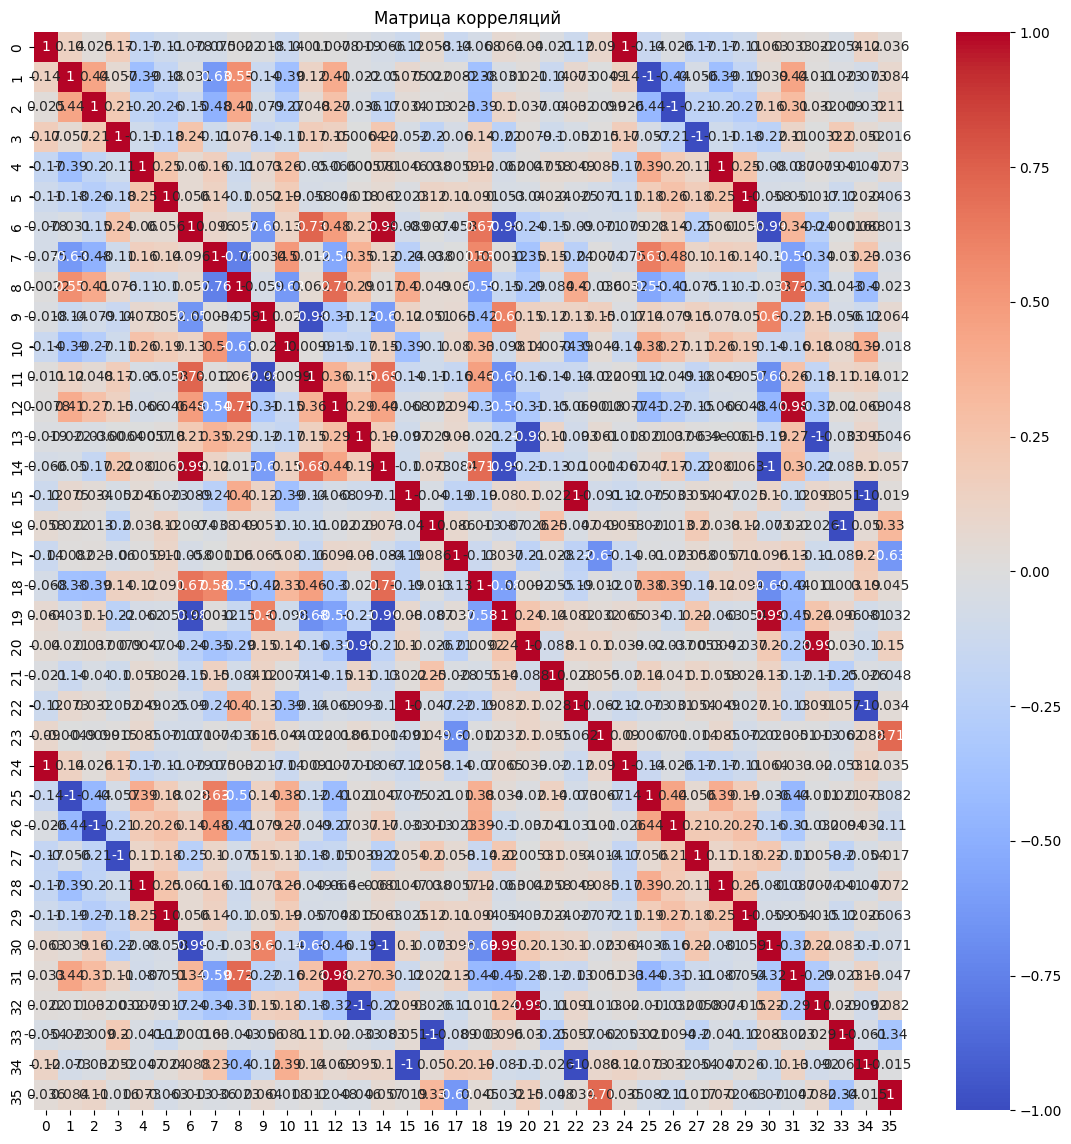

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

# New  dataset

UnboundLocalError: local variable 'ind' referenced before assignment

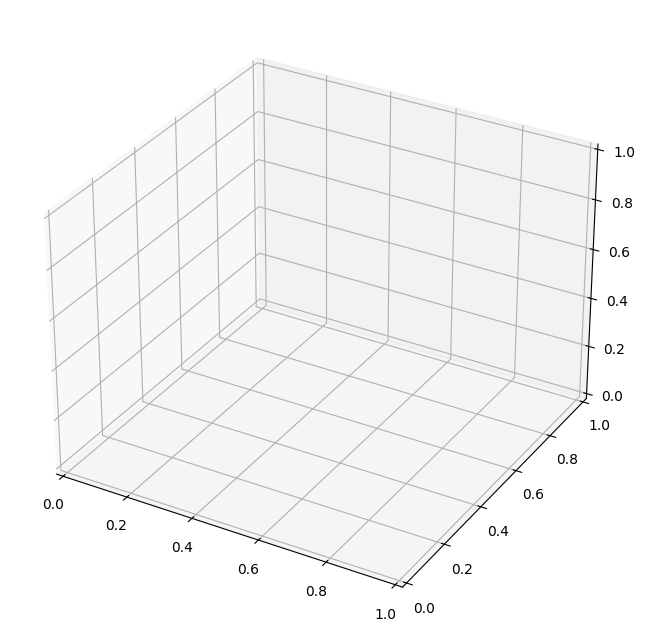

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_points(filename):
    """Загрузка данных из файла с обработкой BOM и разделителей"""
    # Читаем файл как текст, удаляем BOM, затем загружаем в numpy
    with open(filename, 'r', encoding='utf-8-sig') as f:  # utf-8-sig удаляет BOM
        data = np.loadtxt(f, delimiter=None)  # None - автоматическое определение разделителя
    
    positions = data[:, 1:4]  # X, Y, Z
    orientations = data[:, 4:7]  # RZ, RY, RX
    indexes = data[:, 0]
    return positions, orientations, indexes

def visualize_points(positions, orientations, indexes, scale=0.1):
    """Визуализация точек с ориентацией"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Отображаем точки
    if ind == 529:
        ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', s=10, label='Точки')
    else:
        ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='r', s=10, label='Точки')
    
    # Отображаем ориентацию (векторы)
    for pos, ori, ind in zip(positions, orientations, indexes):
        # Преобразуем углы Эйлера в вектор направления
        # (упрощенное представление - можно использовать матрицы поворота для точности)
        rx, ry, rz = ori
        dx = np.cos(rz) * np.cos(ry) * scale
        dy = np.sin(rz) * np.cos(ry) * scale
        dz = np.sin(ry) * scale

        ax.quiver(pos[0], pos[1], pos[2], dx, dy, dz, color='r', length=scale, normalize=True)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Облако ориентированных точек')
    ax.legend()
    plt.show()

# Пример использования
if __name__ == "__main__":
    positions, orientations, indexes = load_points('../data/collect800Points100-20-110/RobotPositions.txt')
    visualize_points(positions, orientations, indexes)


    mesured_positions, mesured_orientations = load_points('../data/AviaStar_TestNormalizeModelV5/MeasuredPositionsTS_ModelForestNewV5.txt')
    # visualize_points(mesured_positions, mesured_orientations)


In [329]:
import pandas as pd
import os
from tqdm import tqdm

def combine_files_with_index_check(folders, target_files, output_file=None):
    """
    Объединяет файлы с проверкой индексов
    
    Параметры:
    - folders: список путей к папкам
    - target_files: имена файлов ['DriveTorque.txt', 'GearTorque.txt', 'Joints.txt']
    - output_file: путь для сохранения (опционально)
    
    Возвращает:
    - Объединенный датафрейм (19 колонок)
    """
    
    # Результирующий датафрейм
    final_df = pd.DataFrame()
    stats = {'total_folders': 0, 'processed_folders': 0, 'errors': 0}
    
    print(f"Обработка {len(folders)} папок...")
    
    for folder in tqdm(folders):
        stats['total_folders'] += 1
        folder_data = {}
        index_ref = None
        valid_folder = True
        
        # Сначала загружаем все файлы из папки и проверяем индексы
        for file_name in target_files:
            file_path = os.path.join(folder, file_name)
            
            try:
                if os.path.exists(file_path):
                    # Чтение файла (7 колонок: индекс + 6 данных)
                    df = pd.read_csv(file_path, sep=' ', header=None, engine='python')
                    
                    # Проверка структуры файла
                    if len(df.columns) != 7:
                        print(f"\nОшибка в {file_path}: ожидается 7 колонок, получено {len(df.columns)}")
                        valid_folder = False
                        break
                        
                    # Устанавливаем индекс (первая колонка)
                    df = df.set_index(0)
                    
                    # Проверка совпадения индексов между файлами
                    if index_ref is None:
                        index_ref = df.index
                    elif not index_ref.equals(df.index):
                        print(f"\nНесовпадение индексов в {file_path}")
                        valid_folder = False
                        break
                        
                    folder_data[file_name] = df
                    
            except Exception as e:
                print(f"\nОшибка чтения {file_path}: {str(e)}")
                valid_folder = False
                break
        
        # Если все файлы загружены и индексы совпадают
        if valid_folder and len(folder_data) == len(target_files):
            try:
                # Горизонтальное объединение (6 колонок из каждого файла)
                combined = pd.concat([
                    # folder_data['DriveTorque.txt'],
                    folder_data['GearTorque.txt'],
                    folder_data['Joints.txt'],
                    folder_data['RobotPositions.txt'],
                    folder_data['MeasuredPositionsLeica.txt']
                ], axis=1)
                
                # Проверка количества колонок (5 файла × 6 колонок = 30)
                # if len(combined.columns) != 30:
                #     print(f"\nНеверное количество колонок в {folder}: {len(combined.columns)}")
                #     stats['errors'] += 1
                #     continue
                
                # Добавляем метку папки (19-я колонка)
                # combined['source_folder'] = os.path.basename(folder.rstrip('/'))
                
                # Добавляем к итоговому датафрейму
                final_df = pd.concat([final_df, combined], axis=0)
                stats['processed_folders'] += 1
                
            except Exception as e:
                print(f"\nОшибка объединения в {folder}: {str(e)}")
                stats['errors'] += 1
    
    # Генерация имен колонок
    if not final_df.empty:
        column_names = (
            # [f'DriveTorque_{i}' for i in range(1, 7)] +
            [f'GearTorque_{i}' for i in range(1, 7)] +
            [f'Joints_{i}' for i in range(1, 7)] +
            [f'RobotPositions_{i}' for i in range(1, 7)] +
            [f'MeasuredPositionsLeica_{i}' for i in range(1, 7)]
            # +['source_folder']
        )
        
        final_df.columns = column_names
        
        # Сохранение
        if output_file:
            try:
                final_df.to_csv(output_file, index=True)
                print(f"\nРезультат сохранен в {output_file}")
            except Exception as e:
                print(f"\nОшибка сохранения: {str(e)}")
    
    # Статистика
    print("\nСтатистика:")
    print(f"Успешно обработано папок: {stats['processed_folders']}/{stats['total_folders']}")
    print(f"Ошибок: {stats['errors']}")
    print(f"Итоговый размер: {final_df.shape} (ожидается 31 колонок)")
    
    return final_df

# Конфигурация
target_files = ['GearTorque.txt', 'Joints.txt', 'RobotPositions.txt', 'MeasuredPositionsLeica.txt']
folders = [
    '../calibS-1/',
    '../data/collect800Points100-20-110/'
    # '../data/calibF/',
    # '../data/robLocate/',
    # '../data/spiraltestS/'
]

# Запуск обработки
result = combine_files_with_index_check(
    folders=folders,
    target_files=target_files,
    output_file='combined_results.csv'
)




Обработка 2 папок...


100%|██████████| 2/2 [00:00<00:00,  3.78it/s]



Результат сохранен в combined_results.csv

Статистика:
Успешно обработано папок: 2/2
Ошибок: 0
Итоговый размер: (969, 24) (ожидается 31 колонок)


 убрать наблюдение, оставить номинальные позиции

In [330]:
result2 = result.drop(result.columns[-6:],axis=1)
# result2 = result2.drop(['RobotPositions_4','RobotPositions_5'],axis=1)
from sklearn.preprocessing import StandardScaler

cols = result2.columns
idx = result2.index

scaler = StandardScaler()
result2_scaled = pd.DataFrame(scaler.fit_transform(result2), columns=cols, index=idx)

In [373]:
result.tail().T

,825,826,827,828,829
GearTorque_1,657.776060,890.203500,815.334170,848.195740,1095.366500
GearTorque_2,2982.653600,3592.641400,4145.854500,4537.849000,4913.765600
GearTorque_3,-1581.906200,-996.207300,-2559.678500,-2417.385300,-2290.910400
GearTorque_4,-626.897700,-674.898440,63.609352,12.881303,130.239230
GearTorque_5,423.342160,434.745060,-628.514040,-718.948400,-754.503900
GearTorque_6,214.779850,222.171300,220.715040,217.544020,254.286000
Joints_1,-153.414410,-150.823870,-148.234910,-145.658070,-143.103530
Joints_2,-40.239994,-35.903340,-30.995667,-25.589163,-19.729456
Joints_3,74.234260,74.383064,73.304640,70.980570,67.361350
Joints_4,115.302340,115.027885,115.141525,115.643620,116.525100


Убрать номинальные позиции, оставить наблюдение

In [ ]:
result_laser = result.drop(result.columns[-12:-6],axis=1)
# result2 = result2.drop(['RobotPositions_4','RobotPositions_5'],axis=1)
from sklearn.preprocessing import StandardScaler

cols = result_laser.columns
idx = result_laser.index

scaler = StandardScaler()
result_laser_scaled = pd.DataFrame(scaler.fit_transform(result_laser), columns=cols, index=idx)

In [ ]:
scaler.var_

array([6.07326868e+05, 6.03979980e+06, 1.21444528e+06, 7.21085189e+04,
       1.40143550e+05, 4.18749061e+04, 3.09869026e+03, 5.26536476e+02,
       7.35744495e+02, 1.11301002e+04, 1.44442716e+03, 1.01947488e+04,
       1.72425666e+06, 4.40009895e+05, 3.26919919e+05, 2.14732738e+03,
       8.68447310e+02, 1.03515942e+03])

In [332]:
result_laser


,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
0,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,94.42929,-53.369570,67.849075,4.676737,17.413774,-15.608587,-1252.076495,2385.188378,172.945809,-162.165013,-1.904765,-55.800566
1,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,91.15101,-52.101610,66.189760,48.378105,27.118320,-67.453530,-1305.505770,2381.478745,173.556856,179.548058,-0.705624,-55.479293
2,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,100.43263,-48.472008,59.058144,-52.297527,44.670227,56.954082,-1162.204972,2440.563549,168.864350,-125.507703,-3.708033,-57.462636
3,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,94.01284,-23.638317,6.143470,4.788668,91.820900,-16.738571,-1075.344403,2433.177913,108.155998,-170.501537,-43.847003,-52.131598
4,0.00000,0.0000,0.0000,0.000000,0.00000,0.00000,94.14889,-49.696484,88.087010,177.040050,57.309727,-188.652970,-1467.711710,2316.170616,60.649428,-163.139138,48.817471,-56.496835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,657.77606,2982.6536,-1581.9062,-626.897700,423.34216,214.77985,-153.41441,-40.239994,74.234260,115.302340,-69.956640,-73.663650,-6118.014730,2765.592689,-565.245296,-31.066979,-87.551811,-147.788827
826,890.20350,3592.6414,-996.2073,-674.898440,434.74506,222.17130,-150.82387,-35.903340,74.383064,115.027885,-69.941230,-68.396600,-6120.318838,2879.643386,-720.340113,-30.973676,-87.549029,-147.883016
827,815.33417,4145.8545,-2559.6785,63.609352,-628.51404,220.71504,-148.23491,-30.995667,73.304640,115.141525,-70.104350,-63.817284,-6122.721720,2993.618449,-875.541731,-30.828082,-87.541443,-148.044951


In [333]:
result_laser_scaled


,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
0,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.516090,0.661132,-0.554616,-0.497819,1.046256,0.475313,1.932069,1.443419,0.051235,-2.468866,2.505204,2.442216
1,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.574982,0.716390,-0.615790,-0.083585,1.301601,-0.038161,1.891380,1.437827,0.052303,4.905293,2.545895,2.452202
2,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.408244,0.874567,-0.878711,-1.037863,1.763425,1.193975,2.000511,1.526899,0.044096,-1.677802,2.444013,2.390557
3,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.523571,1.956816,-2.829510,-0.496758,3.004048,0.464122,2.066660,1.515765,-0.062080,-2.648768,1.081958,2.556252
4,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.521127,0.821205,0.191493,1.135967,2.095994,-1.238523,1.767852,1.339372,-0.145167,-2.489887,4.226385,2.420575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.852396,1.483953,0.472155,-2.264672,1.005893,1.236183,-4.968435,1.233317,-0.319214,0.550772,-1.252626,-0.099666,-1.773591,2.016894,-1.239830,0.360226,-0.401097,-0.416880
826,1.150643,1.732158,1.003633,-2.443426,1.036353,1.272303,-4.921897,1.422308,-0.313729,0.548170,-1.252220,-0.047501,-1.775346,2.188830,-1.511085,0.362240,-0.401003,-0.419808
827,1.054572,1.957261,-0.415100,0.306759,-1.803871,1.265186,-4.875388,1.636184,-0.353487,0.549247,-1.256512,-0.002147,-1.777176,2.360652,-1.782526,0.365382,-0.400746,-0.424841


In [334]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем к нужным столбцам
for col in result_laser_scaled.columns:
    result_laser_scaled = remove_outliers_iqr(result_laser_scaled, col)

In [335]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(
    result_laser_scaled,
    test_size=0.3,          # Доля тестовой выборки (30%)
    random_state=42,        # Фиксируем случайность для воспроизводимости
    shuffle=True            # Перемешивание данных перед разбиением (по умолчанию True)
)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df

Train shape: (656, 18)
Test shape: (282, 18)


,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
139,0.300659,0.200033,-0.332449,-1.214078,0.173249,0.274570,-0.093769,0.420158,-0.191323,-1.041386,1.289512,1.213557,1.929336,-0.005329,0.026232,-2.339390,2.459256,2.578966
378,-1.438314,-1.221301,-0.354684,1.197696,1.718119,-1.428555,0.095209,-1.026679,0.003464,1.068052,-0.502158,-1.154922,-0.053802,-0.336651,1.138163,0.341763,-0.399637,-0.389642
755,1.276353,1.820699,-0.205922,-1.548378,-2.116840,1.386912,1.026344,1.734261,-0.223674,0.333578,-0.658080,-0.000041,-1.483062,0.410659,-2.015482,0.354160,-0.400381,-0.408457
632,1.146053,-0.777345,0.036731,-1.679406,0.956118,1.209096,0.905679,-1.525280,1.045384,0.629100,-0.850060,-0.519800,-0.749051,0.934591,0.428877,0.345027,-0.400583,-0.394665
664,1.075713,-0.141540,-0.604871,-1.480256,1.167382,1.367677,0.863193,-0.557694,0.150839,0.647154,-0.829855,-0.556763,-1.023360,0.385211,0.545006,0.343099,-0.400903,-0.391876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-0.063581,-0.176182,0.025874,0.058121,-1.473432,0.256099,-1.092289,0.063308,0.392378,0.039788,0.824524,-0.383912,1.113371,2.935425,-0.212288,-2.218108,2.467375,1.742428
135,-0.106427,0.122280,1.545884,0.317633,0.140837,0.009816,-0.399466,-0.322478,-0.296725,-1.983088,-0.403260,1.962886,0.658841,-0.756045,0.756688,0.343879,-0.399396,-0.392808
727,0.779642,-0.798048,-0.169642,-1.869181,-0.867424,1.230738,0.975697,-0.533223,-0.463385,0.690975,-1.220775,-0.656592,-1.126159,0.636505,1.167532,0.348080,-0.401171,-0.399128


In [337]:
from sklearn.linear_model import LinearRegression

X_train = train_df.loc[:, :'Joints_6']  # Признаки (колонки 0-17)
y_train = train_df.loc[:, 'MeasuredPositionsLeica_1':]  # Целевые (колонки 18-23)
X_test = test_df.loc[:, :'Joints_6'] 
y_test = test_df.loc[:, 'MeasuredPositionsLeica_1':]


In [338]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [339]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"R² score на тренировочных данных: {train_score:.3f}")
print(f"R² score на тестовых данных: {test_score:.3f}")

R² score на тренировочных данных: 0.709
R² score на тестовых данных: 0.694


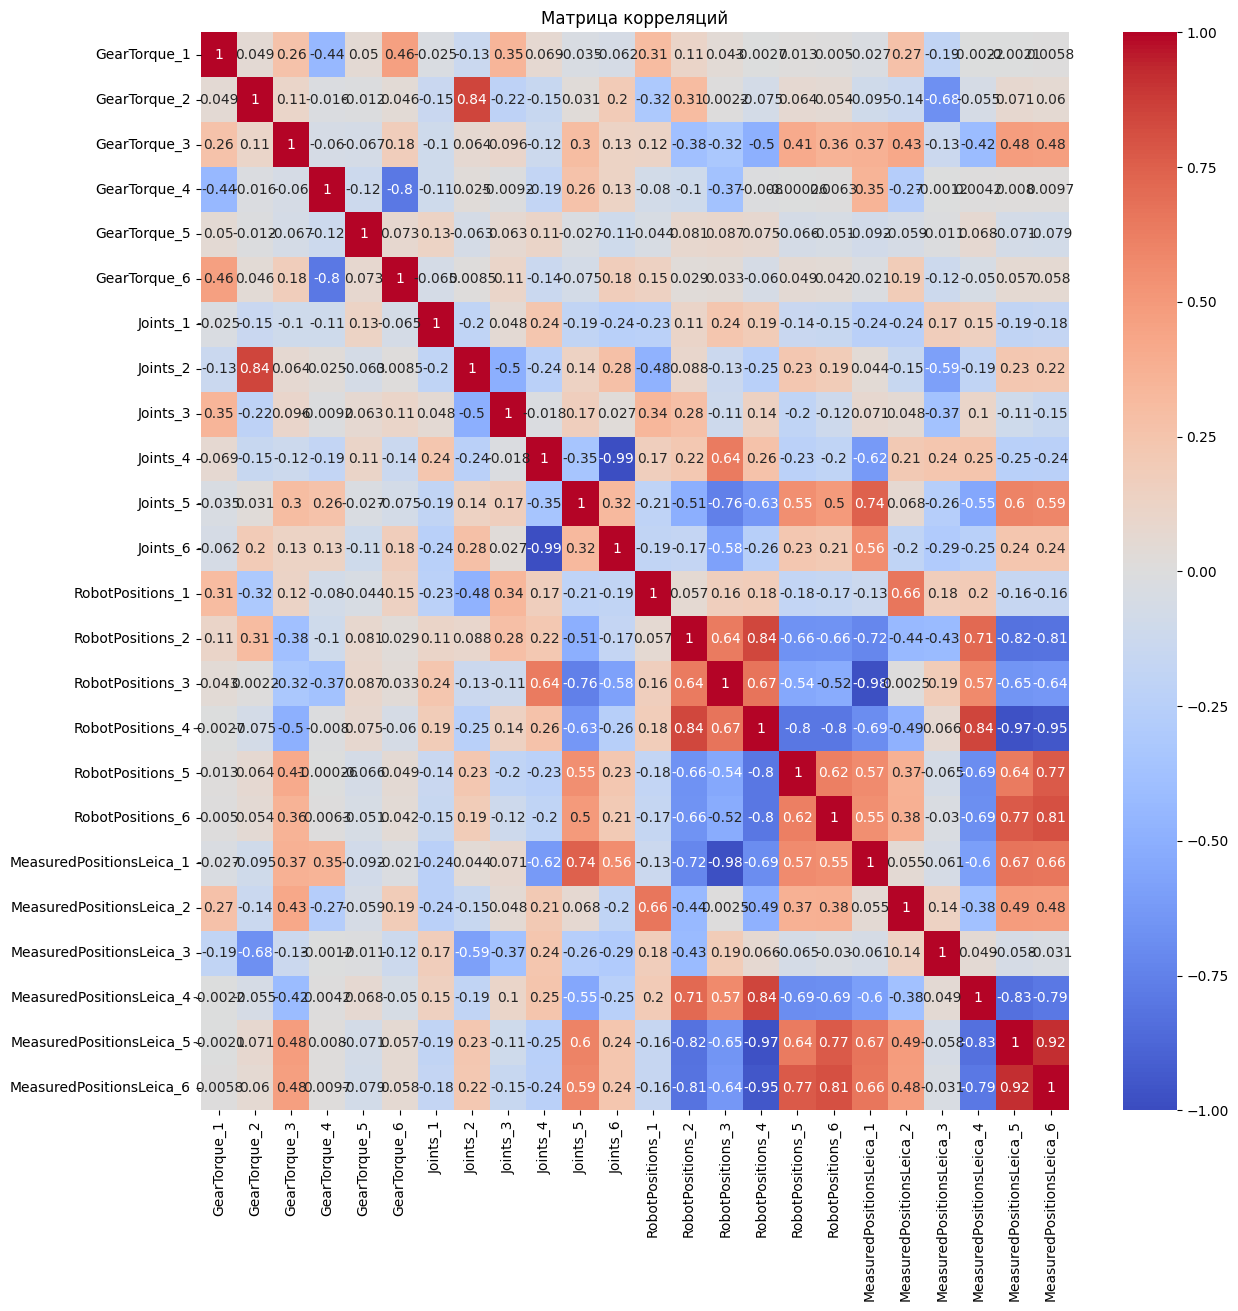

In [340]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = result.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляций")
plt.show()

In [341]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(12, 64)   # Входной слой: 6 -> 64 нейрона
        self.fc2 = nn.Linear(64, 32)  # Скрытый слой: 64 -> 32 нейрона
        self.fc3 = nn.Linear(32, 6)   # Выходной слой: 32 -> 3 нейрона (x, y, z)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Активация ReLU после первого слоя
        x = F.relu(self.fc2(x))  # Активация ReLU после второго слоя
        x = self.fc3(x)          # Выходной слой без активации
        return x

# Пример создания модели
model = SimpleModel()

In [ ]:
y_train

,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,
139,1.929336,-0.005329,0.026232,-2.339390,2.459256,2.578966
378,-0.053802,-0.336651,1.138163,0.341763,-0.399637,-0.389642
755,-1.483062,0.410659,-2.015482,0.354160,-0.400381,-0.408457
632,-0.749051,0.934591,0.428877,0.345027,-0.400583,-0.394665
664,-1.023360,0.385211,0.545006,0.343099,-0.400903,-0.391876
...,...,...,...,...,...,...
111,1.113371,2.935425,-0.212288,-2.218108,2.467375,1.742428
135,0.658841,-0.756045,0.756688,0.343879,-0.399396,-0.392808
727,-1.126159,0.636505,1.167532,0.348080,-0.401171,-0.399128


In [343]:
criterion = nn.MSELoss()  # Функция потерь MSE
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam
num_epochs = 300  # Количество эпох

In [344]:
train_data = TensorDataset(torch.FloatTensor(X_train.to_numpy()), torch.FloatTensor(y_train.to_numpy()))
test_data = TensorDataset(torch.FloatTensor(X_test.to_numpy()), torch.FloatTensor(y_test.to_numpy()))

# Создание DataLoader
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [345]:
for epoch in range(num_epochs):
    model.train()  # Режим обучения
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Обнуляем градиенты
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass и оптимизация
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    # Вывод статистики
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/300, Loss: 0.8913
Epoch 2/300, Loss: 0.7468
Epoch 3/300, Loss: 0.5797
Epoch 4/300, Loss: 0.4283
Epoch 5/300, Loss: 0.3201
Epoch 6/300, Loss: 0.2510
Epoch 7/300, Loss: 0.2122
Epoch 8/300, Loss: 0.1861
Epoch 9/300, Loss: 0.1676
Epoch 10/300, Loss: 0.1498
Epoch 11/300, Loss: 0.1349
Epoch 12/300, Loss: 0.1236
Epoch 13/300, Loss: 0.1126
Epoch 14/300, Loss: 0.1055
Epoch 15/300, Loss: 0.0989
Epoch 16/300, Loss: 0.0889
Epoch 17/300, Loss: 0.0833
Epoch 18/300, Loss: 0.0787
Epoch 19/300, Loss: 0.0729
Epoch 20/300, Loss: 0.0692
Epoch 21/300, Loss: 0.0658
Epoch 22/300, Loss: 0.0632
Epoch 23/300, Loss: 0.0617
Epoch 24/300, Loss: 0.0579
Epoch 25/300, Loss: 0.0558
Epoch 26/300, Loss: 0.0548
Epoch 27/300, Loss: 0.0541
Epoch 28/300, Loss: 0.0502
Epoch 29/300, Loss: 0.0478
Epoch 30/300, Loss: 0.0483
Epoch 31/300, Loss: 0.0458
Epoch 32/300, Loss: 0.0431
Epoch 33/300, Loss: 0.0425
Epoch 34/300, Loss: 0.0409
Epoch 35/300, Loss: 0.0404
Epoch 36/300, Loss: 0.0388
Epoch 37/300, Loss: 0.0386
Epoch 38/3

Metric               Feature 1    Feature 2    Feature 3    Feature 4   
-----------------------------------------------------------------
R2                  0.9872      0.9813      0.9958      0.9210      0.9339      0.9242      
MSE                 0.0119      0.0160      0.0044      0.0698      0.0613      0.0692      
MAE                 0.0543      0.0755      0.0446      0.0903      0.0809      0.0873      
Explained Variance  0.9872      0.9819      0.9959      0.9223      0.9348      0.9254      


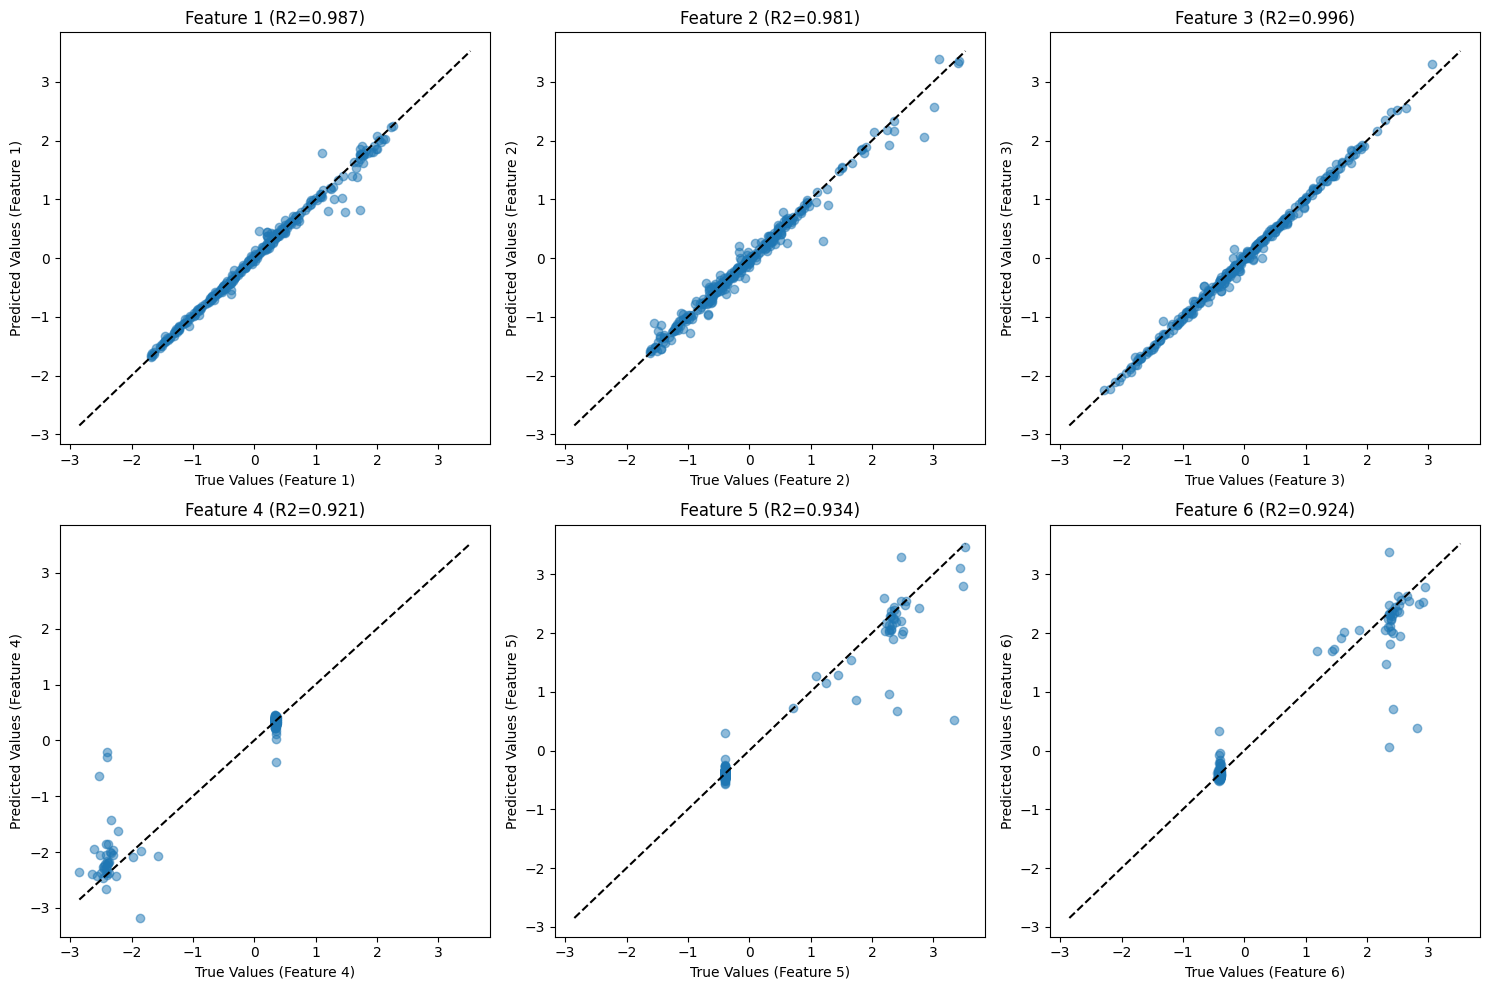


Дополнительные метрики:
Средний R2: 0.9572
Средний MSE: 0.0388
Средний MAE: 0.0722
Объясненная дисперсия: 0.9579


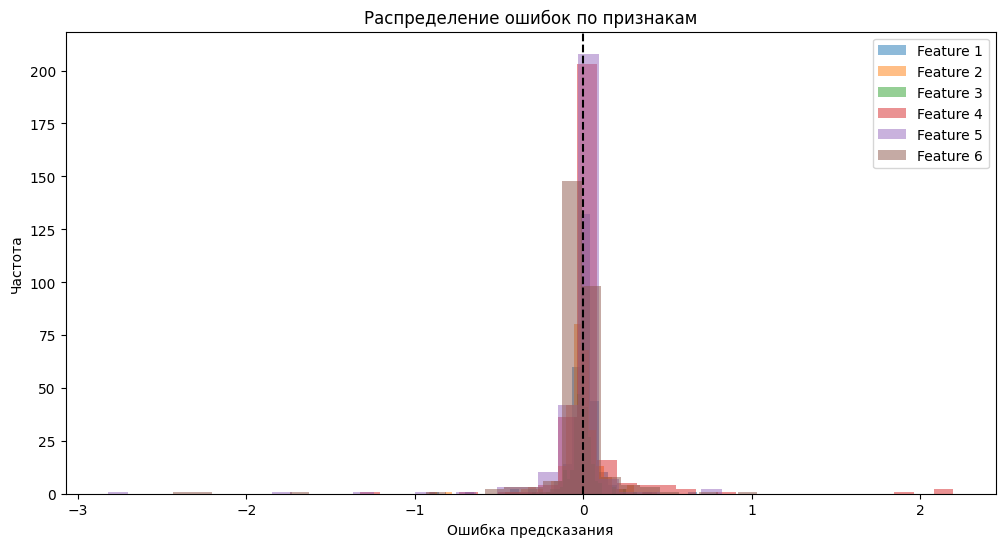

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# 1. Предсказание на тестовых данных
model.eval()  # Переводим модель в режим оценки
all_targets = []
all_predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        all_targets.append(targets.numpy())
        all_predictions.append(outputs.numpy())

# Конвертируем в numpy массивы
y_true = np.vstack(all_targets)
y_pred = np.vstack(all_predictions)

# 2. Вычисление метрик для каждого целевого признака
metrics = {
    'R2': r2_score,
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'Explained Variance': explained_variance_score
}

results = {}
for metric_name, metric_fn in metrics.items():
    results[metric_name] = [metric_fn(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]

# 3. Вывод результатов в таблице
print(f"{'Metric':<20} {'Feature 1':<12} {'Feature 2':<12} {'Feature 3':<12} {'Feature 4':<12}")
print("-" * 65)
for metric, values in results.items():
    print(f"{metric:<20}", end="")
    for val in values:
        print(f"{val:.4f}".ljust(12), end="")
    print()

# 4. Визуализация результатов
plt.figure(figsize=(15, 10))

# График истинных vs предсказанных значений
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(y_true[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel(f'True Values (Feature {i+1})')
    plt.ylabel(f'Predicted Values (Feature {i+1})')
    plt.title(f'Feature {i+1} (R2={results["R2"][i]:.3f})')

plt.tight_layout()
plt.show()

# 5. Дополнительные метрики (по всем признакам)
print("\nДополнительные метрики:")
print(f"Средний R2: {np.mean(results['R2']):.4f}")
print(f"Средний MSE: {np.mean(results['MSE']):.4f}")
print(f"Средний MAE: {np.mean(results['MAE']):.4f}")
print(f"Объясненная дисперсия: {explained_variance_score(y_true, y_pred, multioutput='uniform_average'):.4f}")

# 6. Гистограмма ошибок
errors = y_pred - y_true
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.hist(errors[:, i], bins=30, alpha=0.5, label=f'Feature {i+1}')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок по признакам')
plt.legend()
plt.show()

In [ ]:
result2_restored = pd.DataFrame(scaler.inverse_transform(result2_scaled), 
                               columns=cols, 
                               index=idx)

In [351]:
import pandas as pd

def inverse_standard_scaler(scaled_df: pd.DataFrame, means: list, stds: list) -> pd.DataFrame:
    # Проверка соответствия размеров
    if len(means) != scaled_df.shape[1] or len(stds) != scaled_df.shape[1]:
        expected = scaled_df.shape[1]
        raise ValueError(f"Несоответствие размеров: means/stds должны содержать {expected} элементов")
    
    # Создаём копию датафрейма для преобразования
    original_df = scaled_df.copy()
    
    # Применяем обратное преобразование для каждого столбца
    for i, col in enumerate(original_df.columns):
        original_df[col] = original_df[col] * stds[i] + means[i]
    
    return original_df


In [ ]:
X_test,y_test

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6
0,,,,,,,,,,,,
74,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.124972,1.845183,-1.713477,-0.546064,2.547344,0.736204
197,-0.973838,-0.997369,-0.078222,0.846499,-2.230303,-0.959258,-0.121295,-0.705885,0.672491,-0.415991,1.001425,0.362401
725,-1.095810,-0.244429,-0.857222,0.090762,-0.314968,-1.093791,0.843253,0.249444,-1.360704,0.743623,-1.196516,-0.758358
361,-0.855842,-0.967426,-0.774999,0.859690,-0.198443,-0.889302,0.146973,-0.593518,0.112952,0.986569,-0.191026,-1.052589
74,-1.267502,0.662554,0.261671,1.466925,-1.816096,-0.929799,-0.477569,0.191596,0.902259,-1.173059,0.003844,1.023774
...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.955222,-1.128017,-0.245159,1.328626,1.599944,-1.151352,0.013356,-0.867632,0.724057,1.076703,0.119458,-1.167351
328,0.995720,-0.949043,-0.237909,-1.016016,1.599723,1.377058,-0.034456,-1.654125,1.585384,1.139853,0.265750,-1.243446
544,-1.079394,-0.520060,-0.763036,0.315341,-0.859355,-0.816927,0.542099,-0.158090,-0.106794,0.713936,-0.428825,-0.686540


In [355]:
X_test

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6
0,,,,,,,,,,,,
74,0.008348,0.270309,1.907617,0.069879,-0.124957,0.186600,-0.124972,1.845183,-1.713477,-0.546064,2.547344,0.736204
197,-0.973838,-0.997369,-0.078222,0.846499,-2.230303,-0.959258,-0.121295,-0.705885,0.672491,-0.415991,1.001425,0.362401
725,-1.095810,-0.244429,-0.857222,0.090762,-0.314968,-1.093791,0.843253,0.249444,-1.360704,0.743623,-1.196516,-0.758358
361,-0.855842,-0.967426,-0.774999,0.859690,-0.198443,-0.889302,0.146973,-0.593518,0.112952,0.986569,-0.191026,-1.052589
74,-1.267502,0.662554,0.261671,1.466925,-1.816096,-0.929799,-0.477569,0.191596,0.902259,-1.173059,0.003844,1.023774
...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.955222,-1.128017,-0.245159,1.328626,1.599944,-1.151352,0.013356,-0.867632,0.724057,1.076703,0.119458,-1.167351
328,0.995720,-0.949043,-0.237909,-1.016016,1.599723,1.377058,-0.034456,-1.654125,1.585384,1.139853,0.265750,-1.243446
544,-1.079394,-0.520060,-0.763036,0.315341,-0.859355,-0.816927,0.542099,-0.158090,-0.106794,0.713936,-0.428825,-0.686540


In [356]:
y_test

,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,
74,2.129567,-0.150201,-1.096838,-2.499427,0.707007,2.513701
197,0.225336,-0.520533,0.148923,0.337272,-0.399205,-0.383088
725,-1.222543,-0.017322,1.188563,0.352661,-0.400932,-0.405638
361,-0.153353,-0.646712,0.616606,0.347811,-0.399961,-0.398697
74,0.730471,-0.482924,-0.945094,0.347885,-0.399779,-0.398610
...,...,...,...,...,...,...
302,0.047140,-0.415771,0.244448,0.344790,-0.399456,-0.394319
328,0.117574,0.246976,-0.042649,0.348169,-0.399164,-0.399329
544,-0.763426,-0.478659,0.375236,0.348394,-0.400111,-0.399693


In [360]:
pd.DataFrame(y_pred,columns=y_test.columns,index=y_test.index)

,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,
74,2.020278,-0.003554,-1.131785,-2.382794,0.724569,2.636653
197,0.233274,-0.560760,-0.016576,0.354204,-0.460421,-0.411071
725,-1.189050,-0.047440,1.179383,0.352764,-0.360748,-0.412003
361,-0.162517,-0.724796,0.589251,0.362971,-0.409866,-0.412024
74,0.737545,-0.553853,-0.917287,0.364848,-0.373290,-0.403910
...,...,...,...,...,...,...
302,0.030643,-0.401062,0.252418,0.363028,-0.406344,-0.414881
328,0.107592,0.190531,0.021336,0.307757,-0.398328,-0.424298
544,-0.762269,-0.482064,0.385609,0.352717,-0.403290,-0.427412


In [363]:
shit = scaler.inverse_transform(pd.concat([X_test,y_test],axis=1))

In [364]:
pd.DataFrame(shit,columns=train_df.columns,index=X_test.index)

,GearTorque_1,GearTorque_2,GearTorque_3,GearTorque_4,GearTorque_5,GearTorque_6,Joints_1,Joints_2,Joints_3,Joints_4,Joints_5,Joints_6,MeasuredPositionsLeica_1,MeasuredPositionsLeica_2,MeasuredPositionsLeica_3,MeasuredPositionsLeica_4,MeasuredPositionsLeica_5,MeasuredPositionsLeica_6
0,,,,,,,,,,,,,,,,,,
74,0.00000,1.136868e-13,0.0000,0.000000,0.000000,0.00000,116.201230,-26.199883,36.415440,-0.413105,74.463570,10.733370,-992.741008,1328.088543,-483.486877,-163.581215,-54.896615,-53.500614
197,-765.42944,-3.115444e+03,-2188.4324,208.546110,-788.152160,-234.48111,116.405876,-84.737670,101.133896,13.309574,15.709951,-27.009176,-3493.204611,1082.435379,228.800777,-32.130682,-87.496036,-146.701592
725,-860.48370,-1.265020e+03,-3046.9048,5.607742,-71.131960,-262.01093,170.098310,-62.816320,45.984257,135.648030,-67.824170,-140.171140,-5394.428269,1416.231709,823.234825,-31.417534,-87.546946,-147.427115
361,-673.47340,-3.041856e+03,-2956.2932,212.088150,-27.510006,-220.16574,131.339260,-82.159250,85.956600,161.278660,-29.609869,-169.879440,-3990.463834,998.736840,496.207786,-31.642288,-87.518327,-147.203784
74,-994.28500,9.639817e+02,-1813.8638,375.149230,-633.090760,-228.45276,96.573580,-64.143715,107.366260,-66.560560,-22.203733,39.769050,-2829.906569,1107.382728,-396.724289,-31.638868,-87.512956,-147.201015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-750.92150,-3.436526e+03,-2372.4001,338.011800,645.729550,-273.78983,123.901350,-88.449180,102.532600,170.787690,-17.809750,-181.466750,-3727.195065,1151.927607,283.419269,-31.782279,-87.503446,-147.062945
328,769.47015,-2.996678e+03,-2364.4102,-291.595600,645.646900,243.60774,121.239840,-106.496340,125.895750,177.449950,-12.249833,-189.150050,-3634.707232,1591.549164,119.266199,-31.625726,-87.494827,-147.224121
544,-847.69055,-1.942410e+03,-2943.1096,65.913940,-274.927430,-205.35540,153.334320,-72.167750,79.996090,132.516070,-38.647575,-132.919800,-4791.557216,1110.212015,358.200041,-31.615263,-87.522731,-147.235848
